In [ ]:
import os
import sys  
import rasterio

from rasterio.plot import show

import numpy as np

#from PIL import Image

import numpy as np

import matplotlib.pyplot as plt

from geneticalgorithm import geneticalgorithm as ga

root = os.getcwd() + "/.."

sys.path.insert(0, root)
import src.camera_allocation_functions as aptitude



In [ ]:

fp1 = '../data/processed/aguascalientes/00_clossenes_to_streets_normalized_ags'
walls = rasterio.open(fp1)

fp2 = '../data/processed/aguascalientes/01_densidad_delitos_sobre_calle_1998'
crime_density = rasterio.open(fp2)

fp3 = '../data/processed/aguascalientes/02_manzanas_raster_binary'
blocks = rasterio.open(fp3)

#correction
S = blocks.read(1)
S[S==255] = 0

CD = crime_density.read(1)

W = walls.read(1)

Text(0.5, 0.98, 'Required Maps')

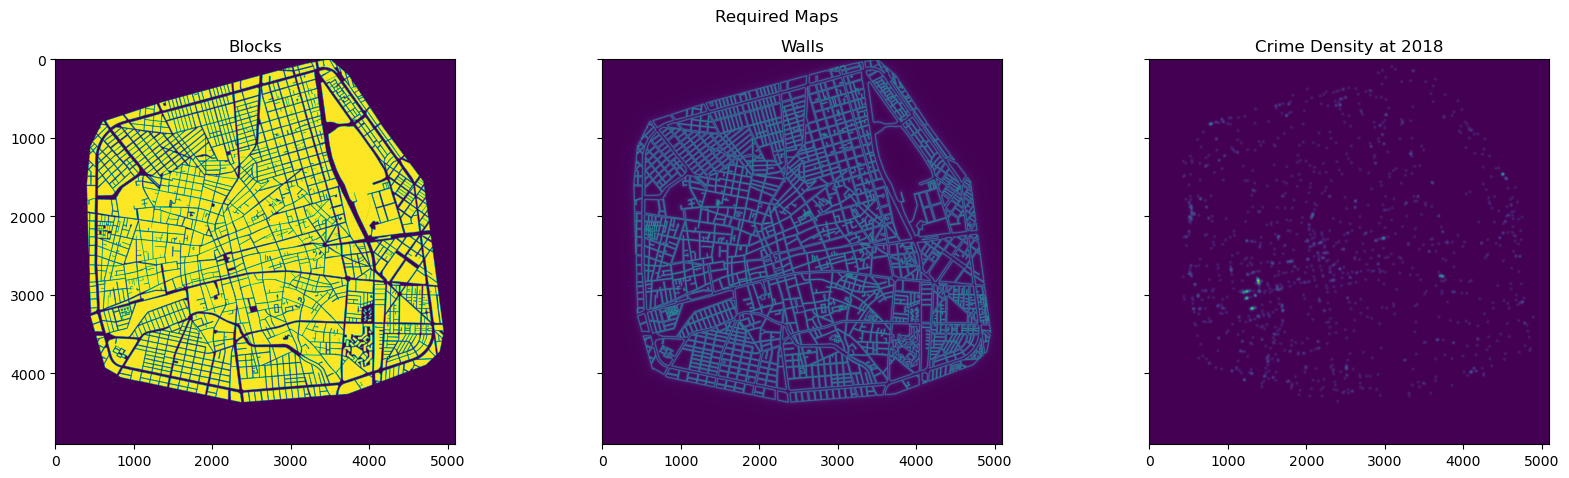

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axs[0].imshow(S)
axs[0].set_title("Blocks")
axs[1].imshow(W)
axs[1].set_title("Walls")
axs[2].imshow(CD)
axs[2].set_title("Crime Density at 2018")
fig.suptitle('Required Maps')


In [ ]:
np.sum(S==0)/(np.sum(S==1)+np.sum(S!=1))

0.5146466147595599

In [ ]:
# we set the parameter of the cover region of the surveillance camera (SC) that is (L*2+1)^2
L = 50

#we test the point 
si = (2836, 1394)

Text(0.5, 1.0, 'Isovist')

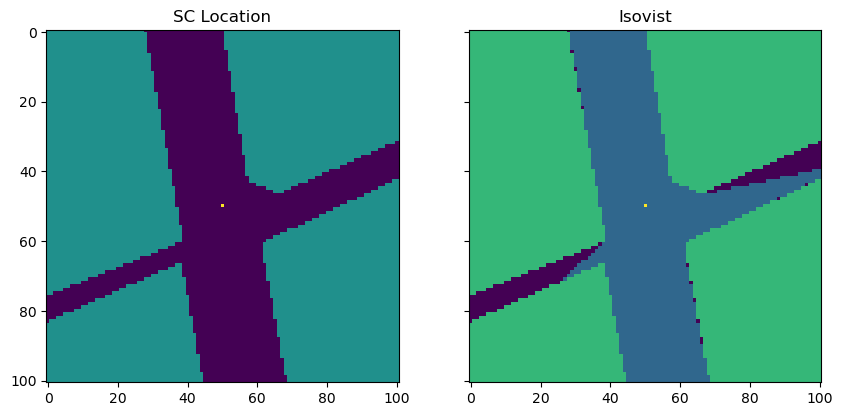

In [ ]:
Sc = np.copy(S)
Sc[si] =  S[si]

RSC = np.copy(Sc[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
RSCc = np.copy(RSC)

Z = np.zeros(np.shape(RSC))
Z[(L, L)] = 2

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].imshow(RSC+Z)
axs[0].set_title("SC Location")
axs[1].imshow(aptitude.isovista(RSCc)+RSCc*2+Z)
axs[1].set_title("Isovist")

Text(0.5, 1.0, '2654.0')

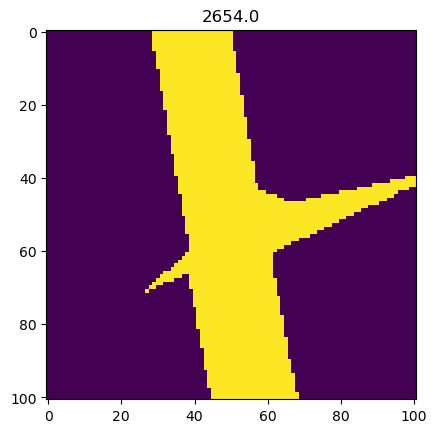

In [20]:
plt.imshow(aptitude.isovista(RSCc))
plt.title(np.sum(aptitude.isovista(RSCc)))

In [18]:
aptitude.isovista(RSCc).shape

(101, 101)

In [8]:
from timeit import default_timer as timer

T =list([])

K = aptitude.gkern(L*2 + 1, 2)

for i in range(1000):
    

    start = timer()

    i = L
    j = L

    si = (i, j)
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])

    #es la operacion mas costosa
    mask = aptitude.isovista(S_sub)


    p = np.sum(CD_sub*K*mask)

    end = timer()

    #print((end - start))
    T.append((end - start))

In [26]:
sm = np.sum(1*(S==0)*(CD>0))

In [27]:
size = CD.shape[0]*CD.shape[1]

In [31]:
24*(sm/size)

1.7075655198626645

In [22]:
import pandas as pd

In [29]:
df = pd.DataFrame(data = {"visibility coefficient": [0], "area": [0],"i": [0], "j": [0]})


p = 100
a = 200
i = 90
j = 80
newData = pd.DataFrame({"visibility coefficient": [p], "area": [a],"i": [i], "j": [j]})

df = pd.concat([df, newData], ignore_index=True)

In [30]:
newData = pd.DataFrame({"visibility coefficient": [p], "area": [a],"i": [i], "j": [j]})

df = pd.concat([df, newData], ignore_index=True)

In [31]:
df

visibility coefficient  area   i   j
0                       0     0   0   0
1                     100   200  90  80
2                     100   200  90  80

In [ ]:
df = pd.DataFrame(data = {"visibility coefficient": [0], "area": [0],"i": [0], "j": [0]})

m = 0
c = 0

K = aptitude.gkern(L*2 + 1, 2)

for i in range(L, S.shape[0]-L):
    for j in range(L, S.shape[1]-L):
        
        si = (i, j)
        
        S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        
        CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        
        #if si is street with some crime then compute isovista:
        if S[si]==0 and CD[si]>0:
            
            isovist = aptitude.isovista(S_sub)
            
            area = np.sum(isovist)
        
            p = np.sum(CD_sub*K*isovist)
            
            #agregar a dataframe lista con y,j,p
            newData = pd.DataFrame({"visibility coefficient": [p], "area": [area], "i": [i], "j": [j]})
            
            df = pd.concat([df, newData], ignore_index=True)
                    
        c = c +1
        
        if c%100000==0:
            print(c)
        
            
            
            
            

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000
1

In [57]:
#df.to_csv("fitness_positions.csv")

In [126]:
DF = pd.read_csv("fitness_positions.csv")

In [127]:
DF_sort = DF.sort_values(by = ['f'], ascending = False)

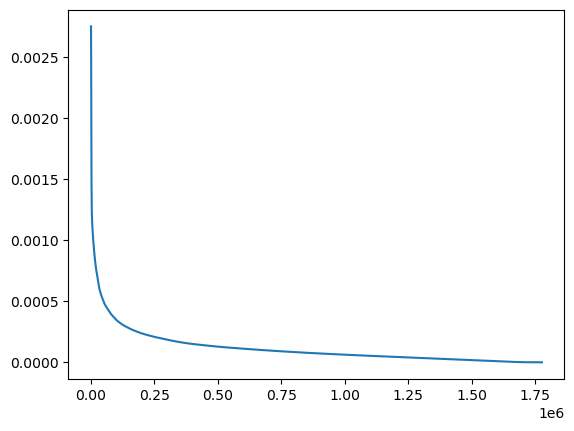

In [128]:
plt.plot(np.array(DF_sort[:]['f']))

In [129]:
A = (np.array(DF_sort[0:1]["i"])-np.array(DF_sort[:]["i"]))**2

In [130]:
B = (np.array(DF_sort[0:1]["j"])-np.array(DF_sort[:]["j"]))**2

In [131]:
N = (A+B)**(0.5)<50

In [132]:
np.sum(N)

2864

In [137]:
DF_sort

Unnamed: 0             f     i     j
1063599     1063599  2.754023e-03  2836  1394
1064110     1064110  2.753733e-03  2837  1394
1063088     1063088  2.753293e-03  2835  1394
1064111     1064111  2.753039e-03  2837  1395
1064621     1064621  2.752662e-03  2838  1394
...             ...           ...   ...   ...
577821       577821  9.722918e-11  1821  2821
892237       892237  9.549662e-11  2524  2394
676380       676380  9.545438e-11  2081  4149
387385       387385  9.370800e-11  1322  2271
0                 0  0.000000e+00     0     0

[1777256 rows x 4 columns]

In [135]:
DF_sort_2 = df_sort[N==False]

In [138]:
DF_sort_3 = DF_sort_2.sort_values(by = ['f'], ascending = False)

In [141]:
DF_sort_2[0:1]

f     i     j
1025474  0.001509  2771  3721

In [139]:
DF_sort_3

f     i     j
1025474  1.509316e-03  2771  3721
1026500  1.507523e-03  2773  3721
1025990  1.506299e-03  2772  3720
1025992  1.506037e-03  2772  3722
1024946  1.505849e-03  2770  3720
...               ...   ...   ...
577821   9.722918e-11  1821  2821
892237   9.549662e-11  2524  2394
676380   9.545438e-11  2081  4149
387385   9.370800e-11  1322  2271
0        0.000000e+00     0     0

[1774392 rows x 3 columns]

In [97]:
CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])

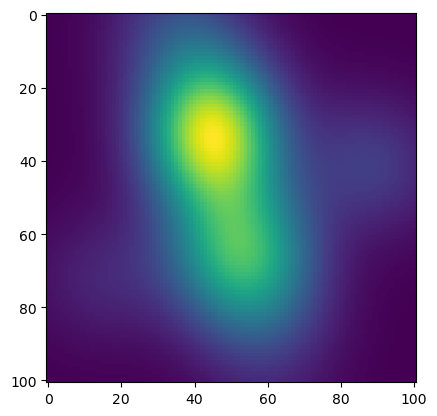

In [98]:
plt.imshow(CD_sub)

In [64]:
def F(X, S=S, Walls=W, CD=CD):
    
    return aptitude.F(X, S, Walls, CD)

In [65]:
#testing F

# num of cameras

n_cameras = 10

varbound = np.array([[L, S.shape[0]-L-1], [L, S.shape[1]-L-1]]*n_cameras)

X = np.array([np.random.randint(p[0], p[1]) for p in varbound])

In [66]:
X_resh = X.reshape(-1, 2)

In [101]:
X_resh = [[2836, 1394]]
n_cameras = 1

checar coordenada: (447, 249)

(2836, 1394)


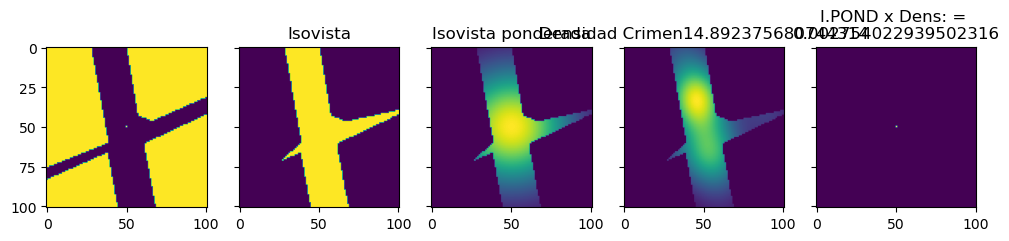

In [102]:
COVERS = np.zeros((n_cameras+1, S.shape[0], S.shape[1]))

for i, x in enumerate(X_resh):
    
    si = tuple(x)
    print(si)
    
    Z = np.zeros((101, 101))
    Z[(L, L)] = 1
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
    mask = aptitude.isovista(S_sub)
    K = aptitude.gkern(L*2 + 1, 2)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
    axs[0].imshow(S_sub+Z)
    axs[1].imshow(mask)
    axs[1].title.set_text("Isovista")
    axs[2].imshow(mask*K)
    axs[2].title.set_text("Isovista ponderada")
    axs[3].imshow(CD_sub*mask)
    axs[3].title.set_text("Densidad Crimen" + str(np.sum(CD_sub*mask)))
    axs[4].imshow(CD_sub*K*mask+Z*np.max(CD_sub*mask))
    axs[4].title.set_text("I.POND x Dens: = \n"+str(np.sum(CD_sub*K*mask)))
    
    COVERS[i+1, si[0]-L : si[0] + L + 1, si[1]-L:si[1]+L+1] = CD_sub*K*mask

    plt.show()
    
max_covers = np.max(COVERS, axis=0)
    
   

    
    
    

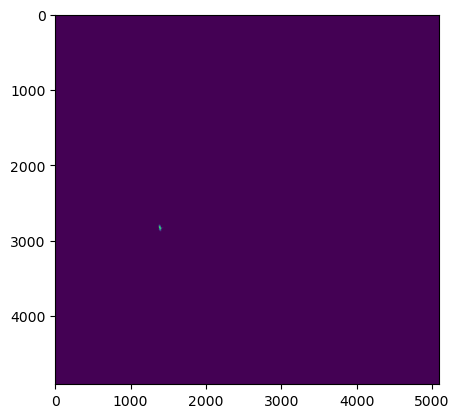

In [103]:
plt.imshow(max_covers)

In [151]:
np.mean(T)*S.shape[0]*S.shape[1]/60/60

23.205142120352388

In [106]:
m = 0

c = 0
for i in range(L, (S.shape[1])):
    for j in range(L, (S.shape[0])):
        

        
        si = (i, j)
        S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
        mask = aptitude.isovista(S_sub)
        K = aptitude.gkern(L*2 + 1, 2)
        
        
        p = np.sum(CD_sub*K*mask)
        if m > p:
            m = p
            x_max = j
            y_max = i
            
        if (c%1000)==0:
            print("pix:", c)
        c+=1
        
  
   
            
            
        

pix: 0
pix: 1000
pix: 2000
pix: 3000
pix: 4000
pix: 5000


KeyboardInterrupt: 

NameError: name 'COVERS' is not defined

In [ ]:
si = (2836, 1394)

Text(0.5, 1.0, '2.4525938932019204e-05')

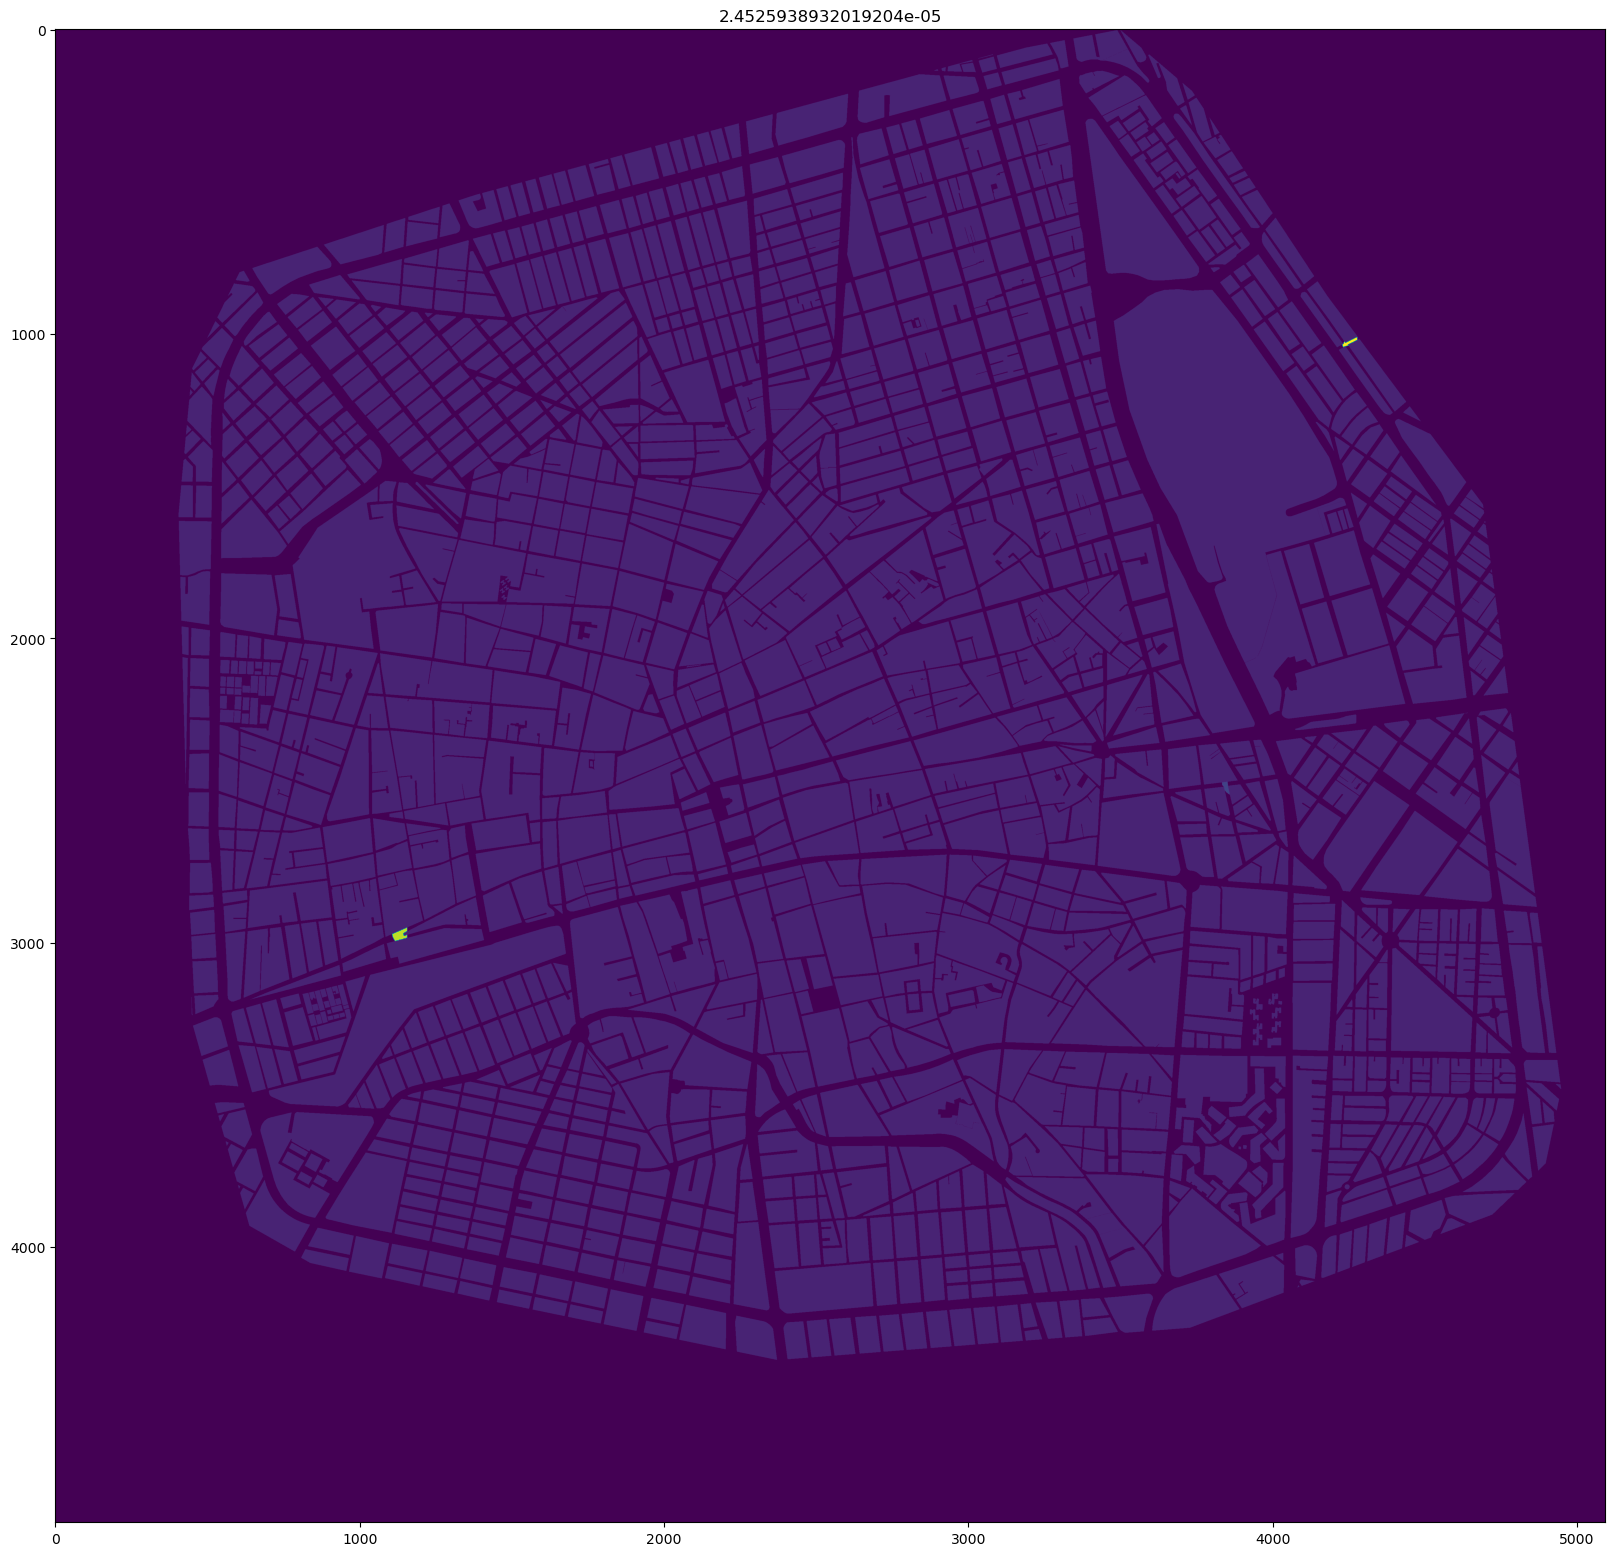

In [21]:
plt.figure(figsize=(20, 20))
arg_max_covers = np.argmax(COVERS, axis=0)
max_covers = np.max(COVERS, axis=0)
plt.imshow(arg_max_covers+S*1)
plt.title(np.sum(max_covers))

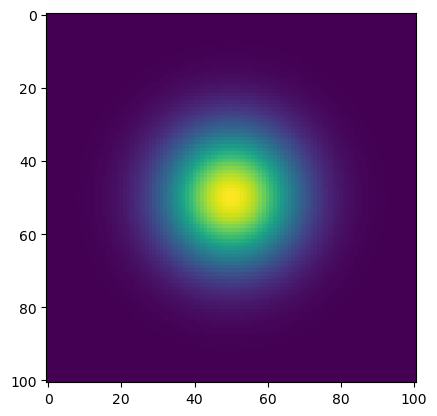

In [68]:
plt.imshow(aptitude.gkern(L*2+1, 4))

In [69]:
n_sensors = 10
varbound = np.array([[L, S.shape[0]-L-1], [L, S.shape[1]-L-1]]*n_sensors)
dim = len(varbound)

In [152]:
algorithm_parameters = {"max_num_iteration": 20, 
                        "population_size": 30, 
                        "mutation_probability": 0.01, 
                        "elit_ratio": 0.1, 
                        "crossover_probability": 0.5, 
                        "parents_portion": 0.3, 
                        "crossover_type": 
                        "uniform", 
                        "max_iteration_without_improv": 20}

In [153]:
model = ga(function = F,
             dimension = dim,
             algorithm_parameters = algorithm_parameters,
             variable_type = 'int',
             variable_boundaries = varbound,
             convergence_curve = True)

 The best solution found:                                                                           
 [2726. 2511. 2246. 3145. 4043. 1465. 3978. 4116. 2063. 2534. 2836. 4151.
 1147. 1277. 3977. 1128. 2269. 3725. 3360. 4575.]

 Objective function:
 -0.0031769331911211413


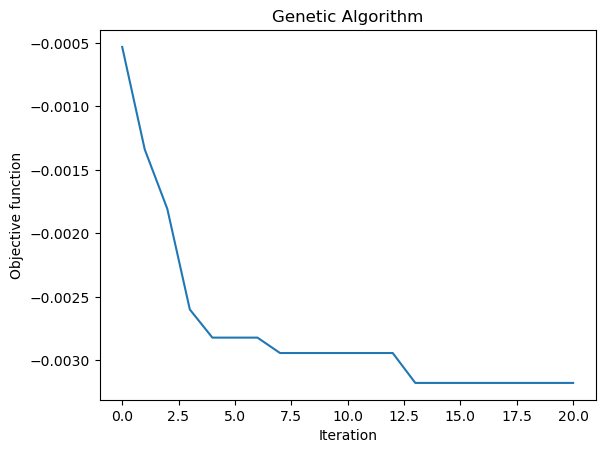

In [154]:
model.run()

In [155]:
Xresh = model.output_dict["variable"].astype(int).reshape(-1,2)

(2726, 2511)


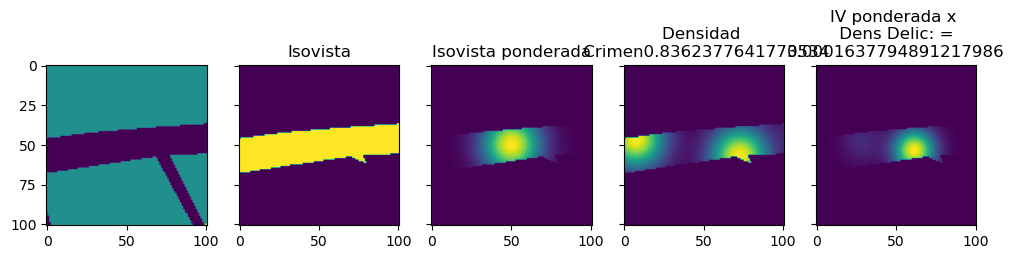

(2246, 3145)


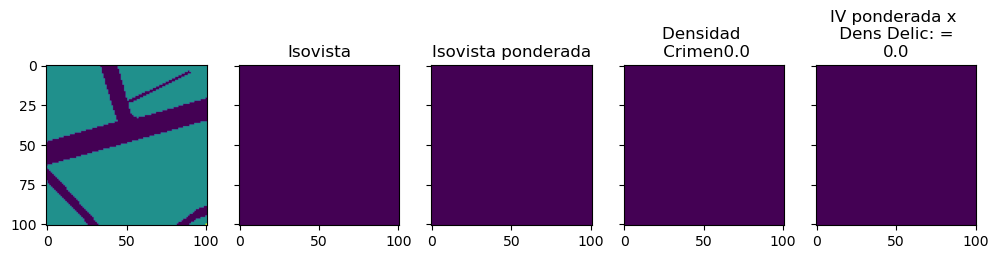

(4043, 1465)


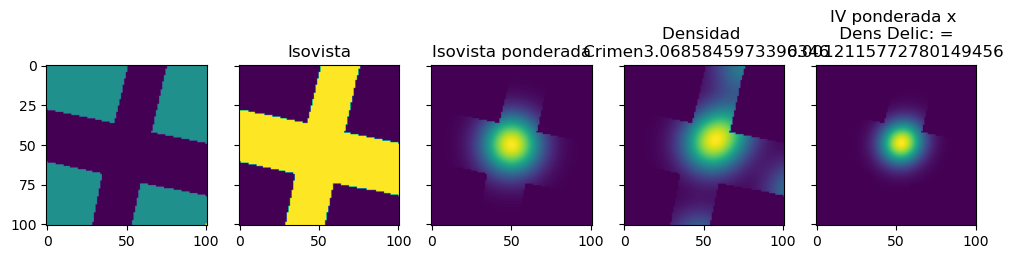

(3978, 4116)


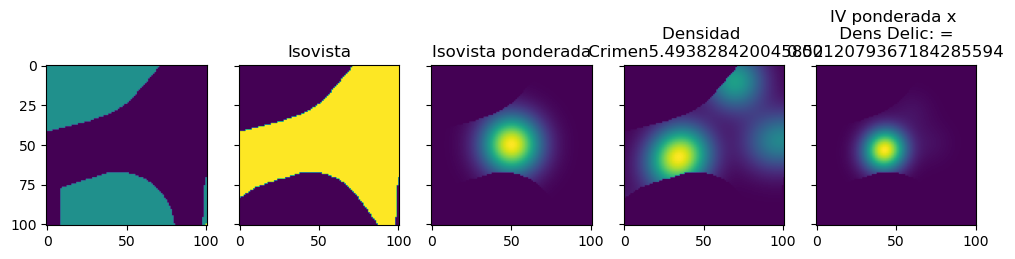

(2063, 2534)


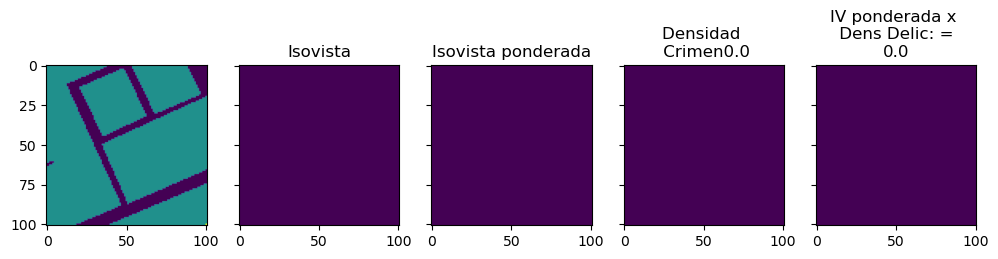

(2836, 4151)


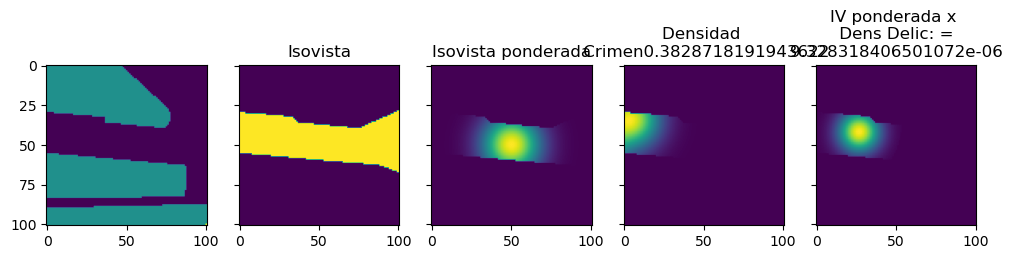

(1147, 1277)


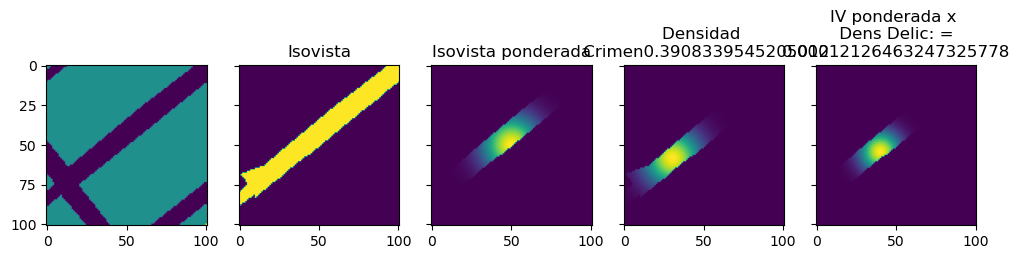

(3977, 1128)


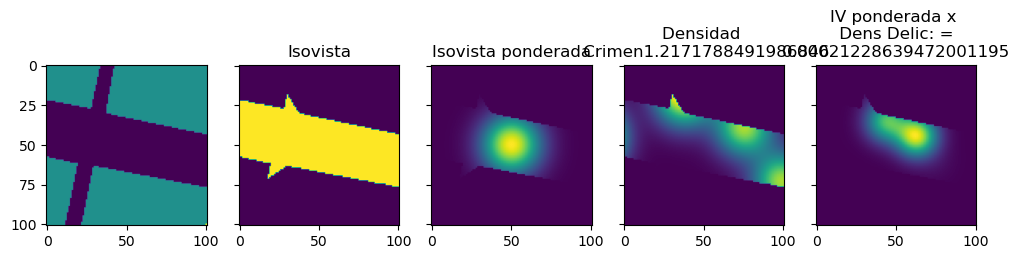

(2269, 3725)


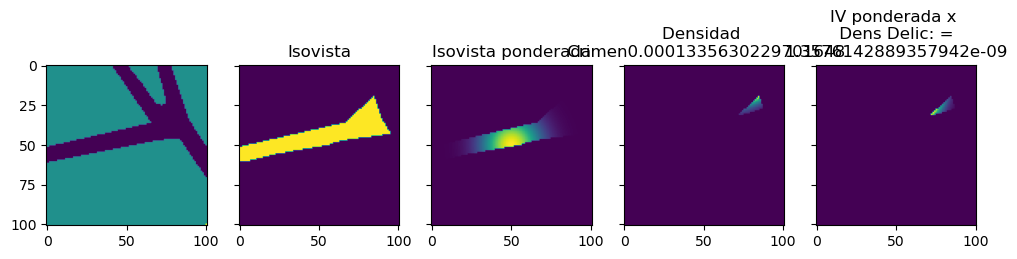

(3360, 4575)


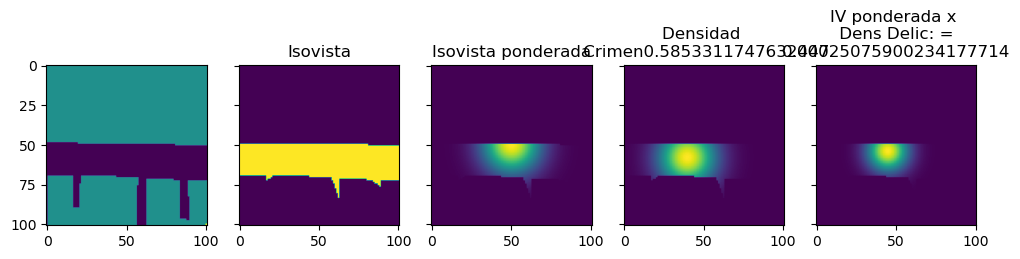

In [159]:
COVERS = np.zeros((n_sensors+1, S.shape[0], S.shape[1]))

for i, x in enumerate(Xresh):
    
    si = tuple(x)
    print(si)
    
    Z = np.zeros((L*2+1, L*2+1))
    Z[(L*2, L*2)] = 1
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
    mask = aptitude.isovista(S_sub)
    K = aptitude.gkern(101, 4)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
    axs[0].imshow(S_sub+Z)
    
    axs[1].title.set_text("Isovista")
    axs[1].imshow(mask)
    
    axs[2].title.set_text("Isovista ponderada")
    axs[2].imshow(mask*K)
    
    axs[3].title.set_text("Densidad \n Crimen" + str(np.sum(CD_sub*mask)))
    axs[3].imshow(CD_sub*mask)
    
    axs[4].imshow(CD_sub*K*mask)
    axs[4].title.set_text("IV ponderada x \n Dens Delic: = \n"+str(np.sum(CD_sub*K*mask)).format)
    
    COVERS[i+1, si[0]-L : si[0] + L + 1, si[1]-L:si[1]+L+1] = CD_sub*K*mask

    plt.show()
    
max_covers = np.max(COVERS, axis=0)
    
   
   


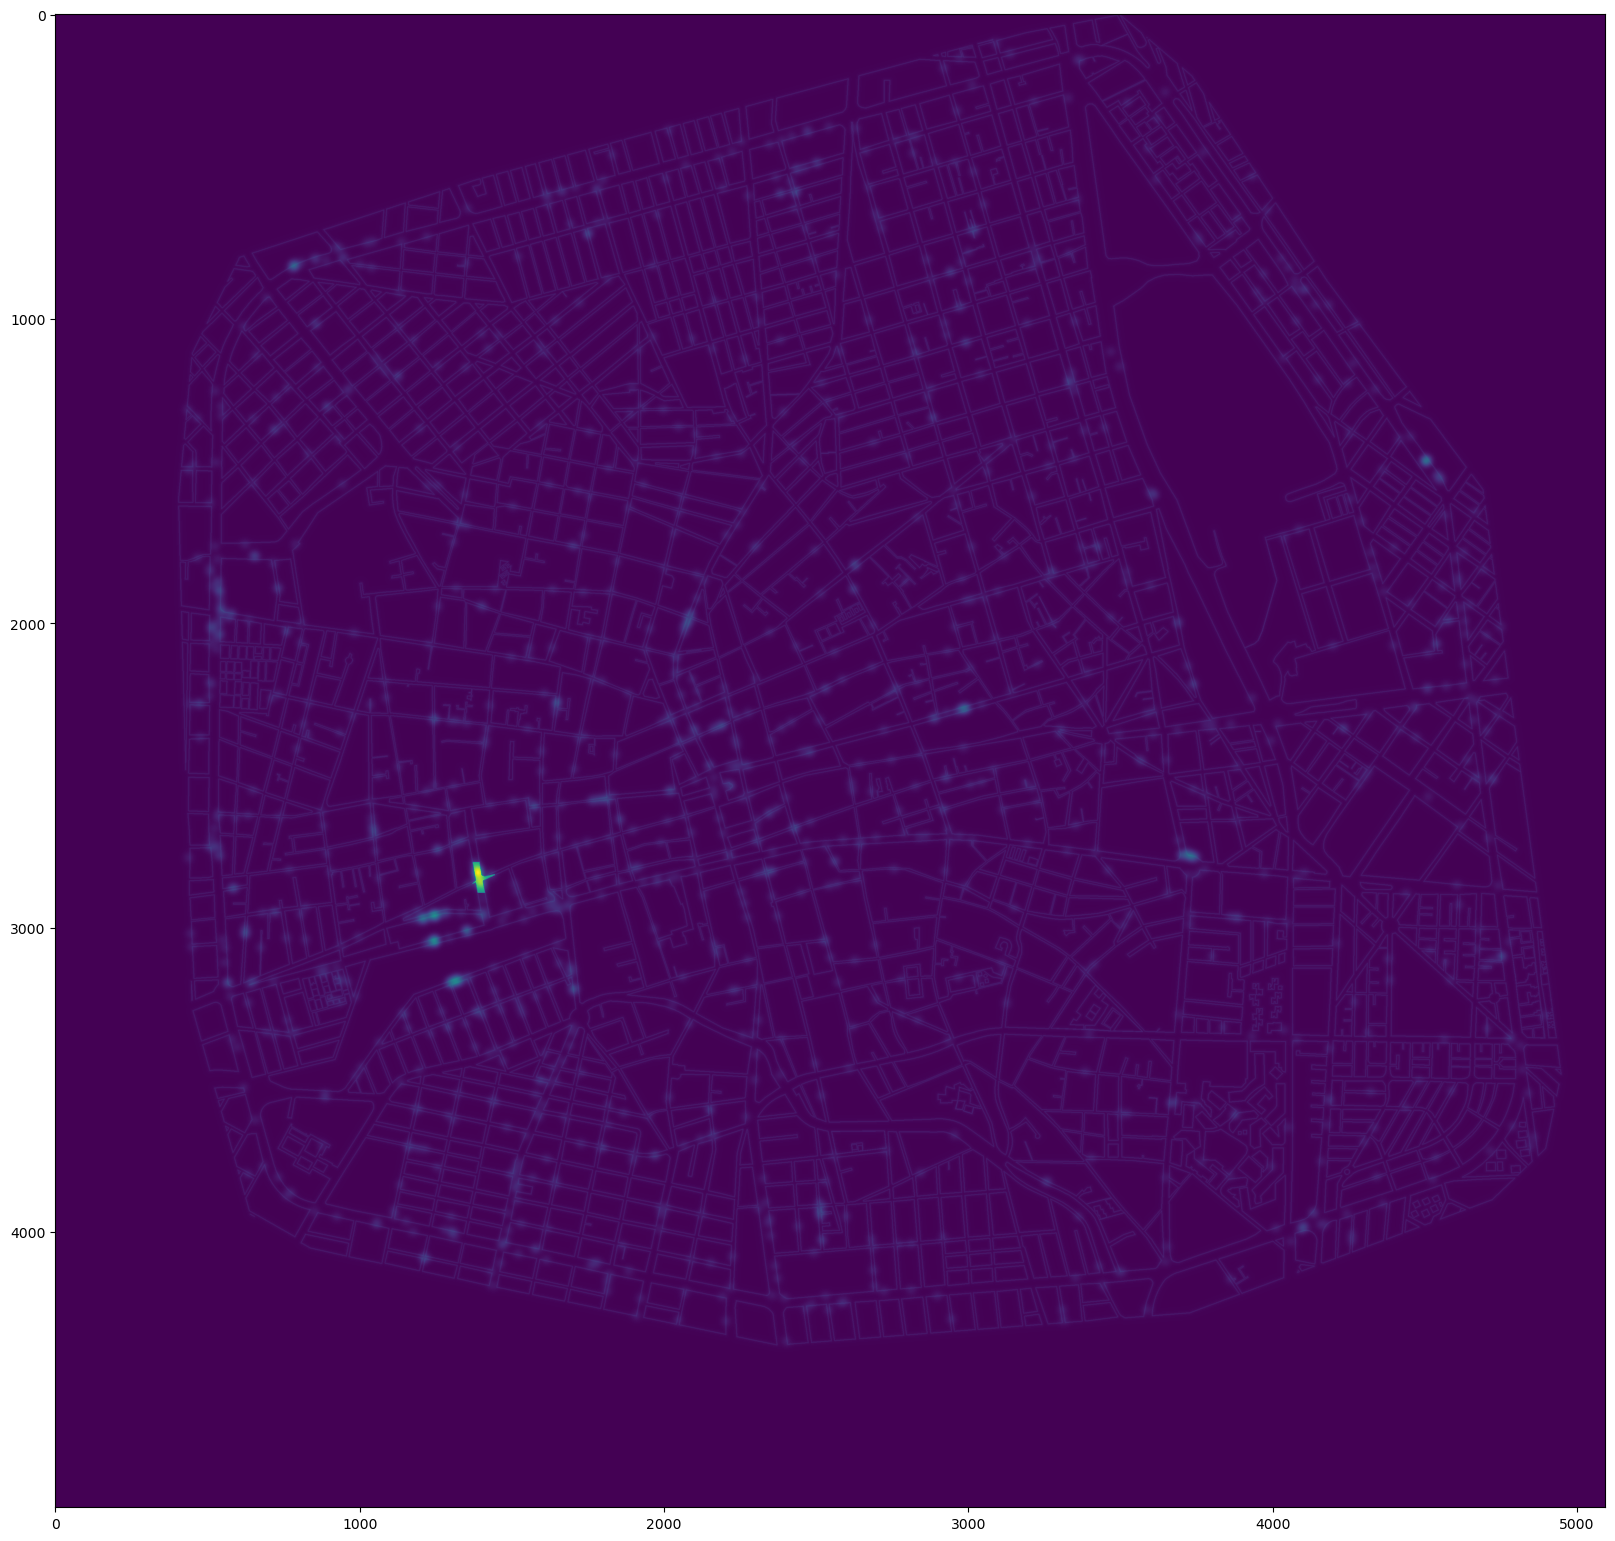

In [104]:
plt.figure(figsize=(20, 20))
plt.imshow(5*(max_covers>0)+W+CD*500)

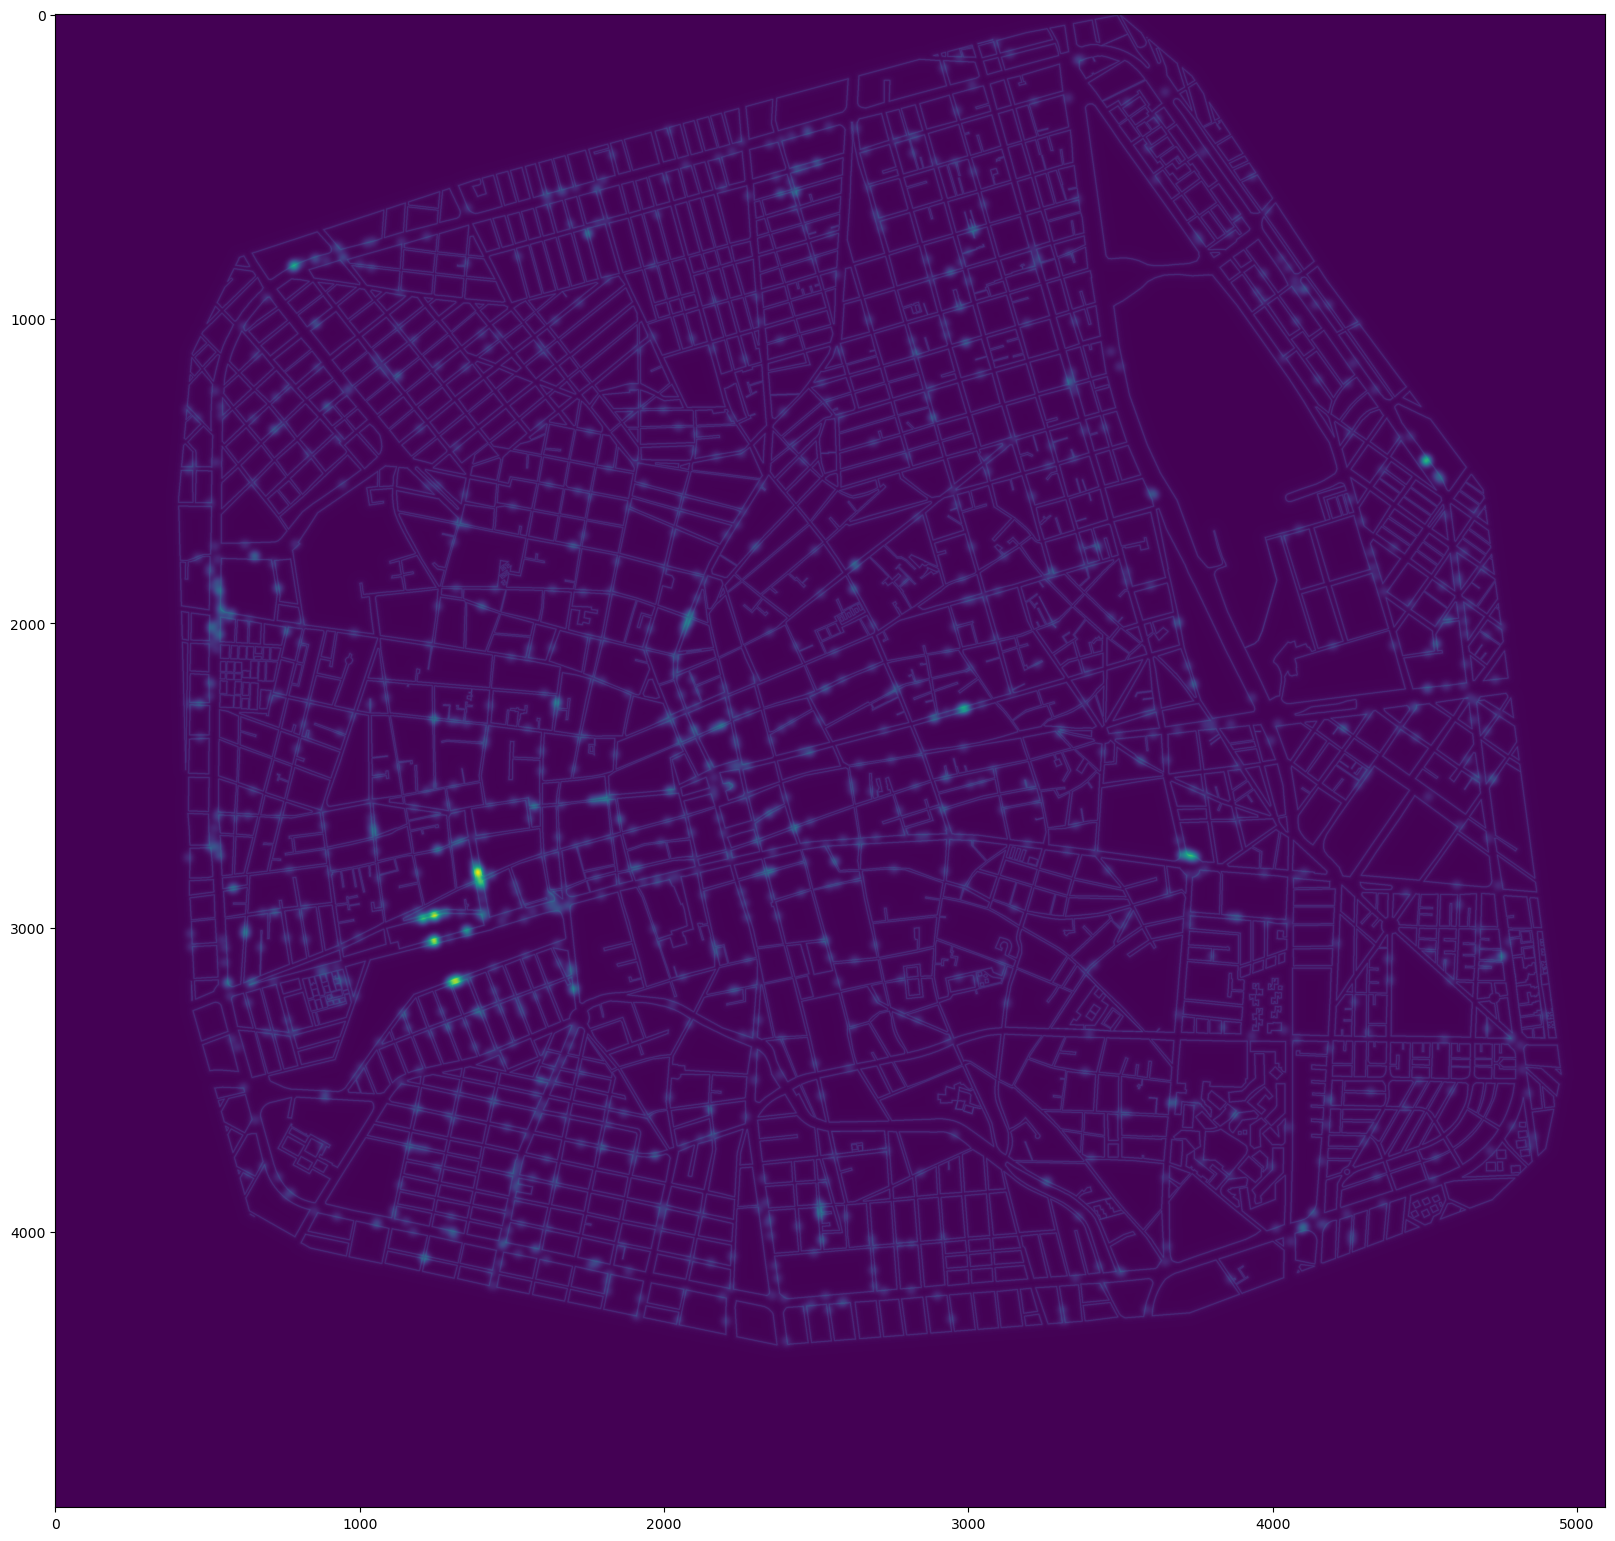

In [161]:
plt.figure(figsize=(20, 20))
plt.imshow(W+CD*500)

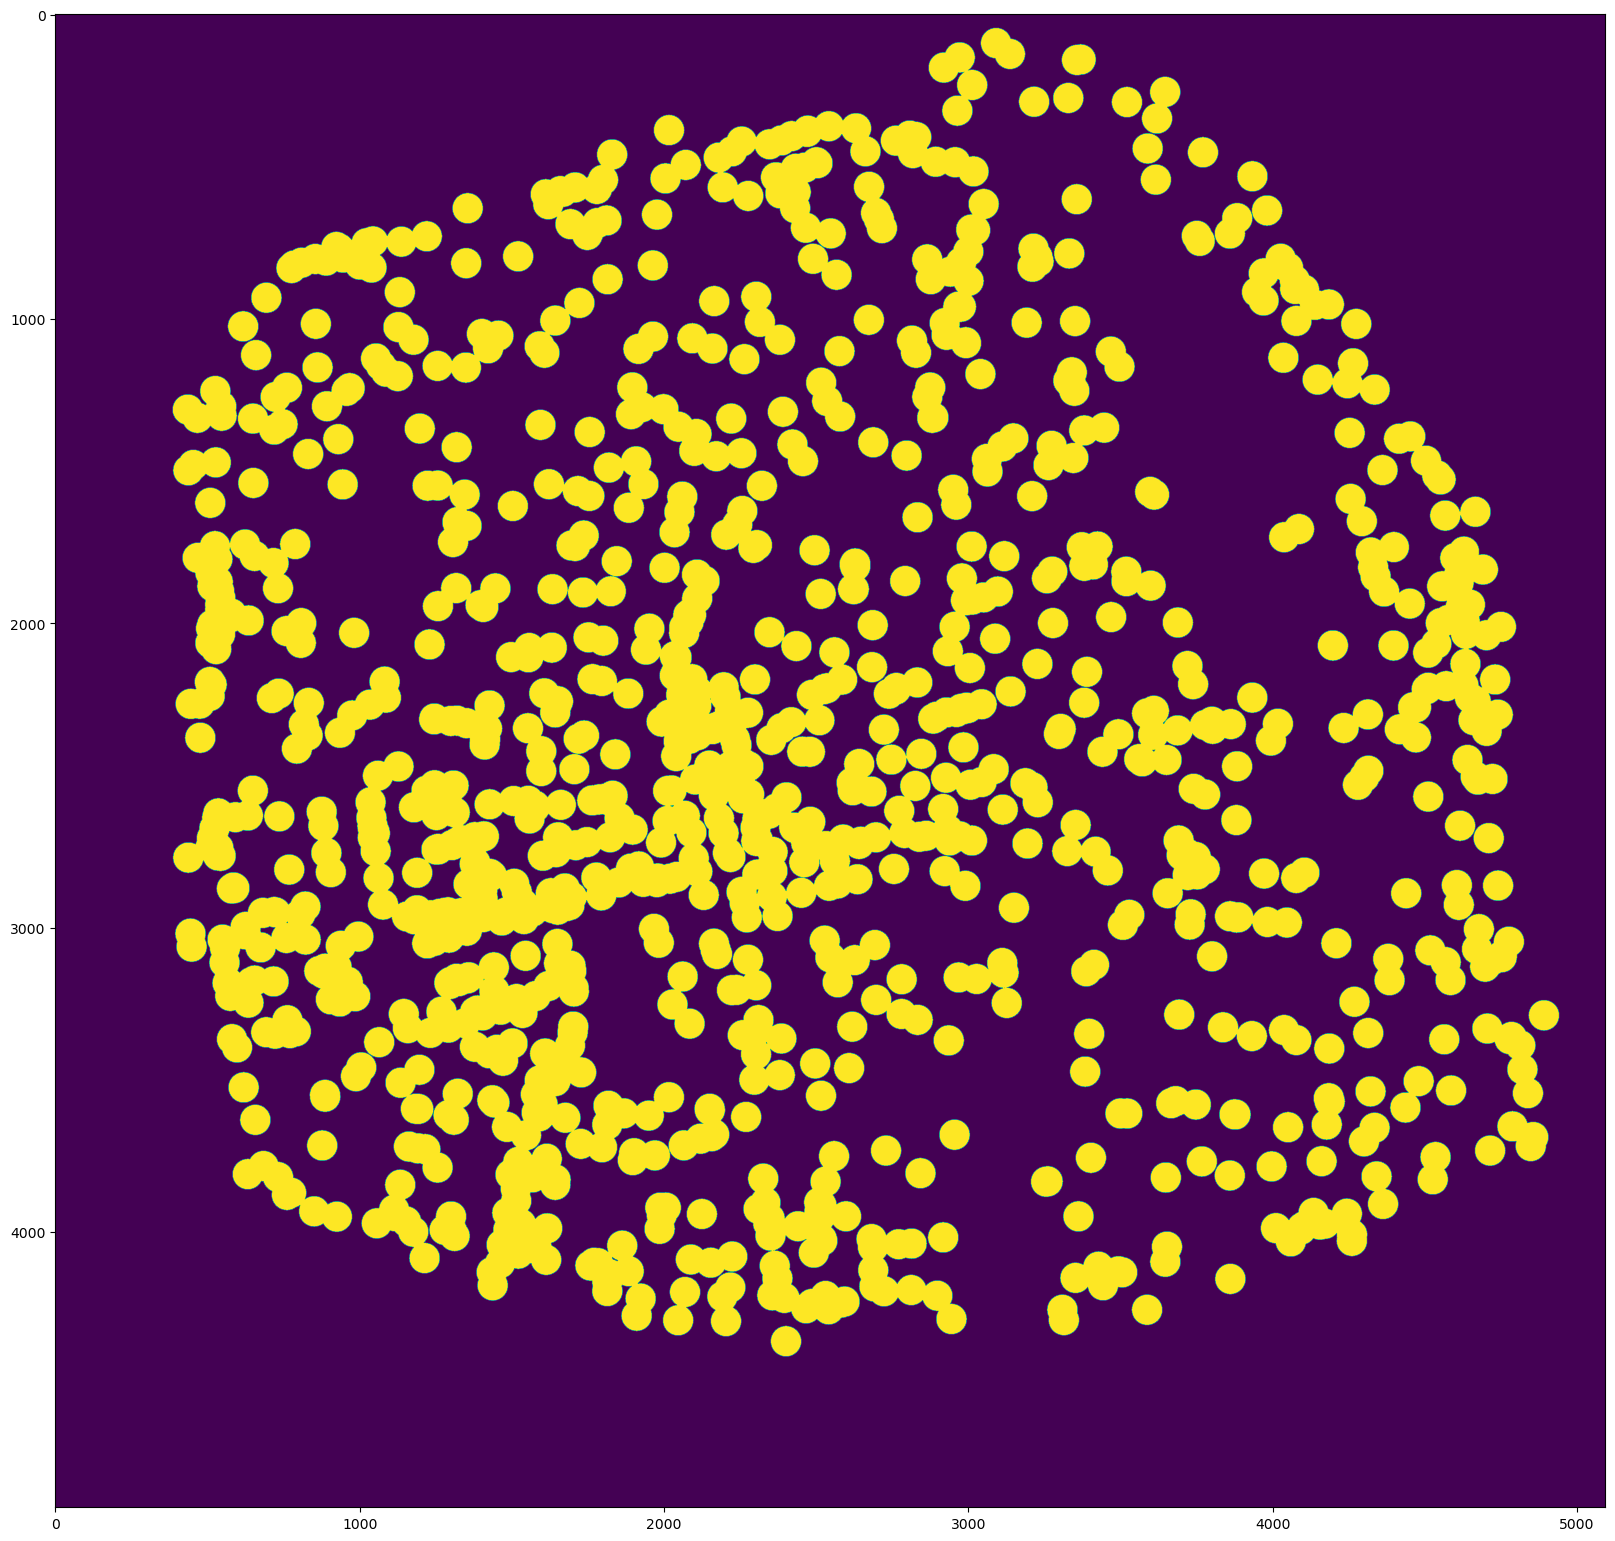

In [162]:
plt.figure(figsize=(20, 20))
plt.imshow((CD>0)*1)
#plt.imshow()

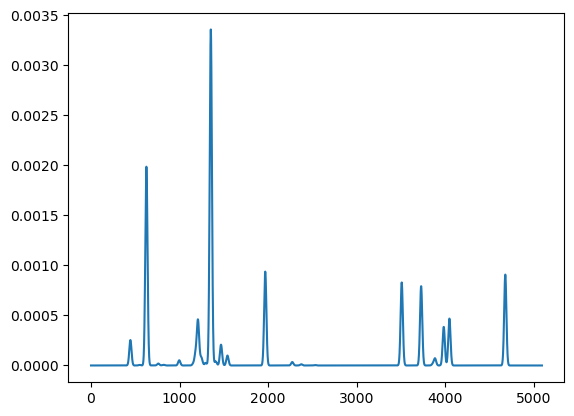

In [200]:

plt.plot(CD[3000,:])

In [202]:
nsig = 2
kernlen = L*2
x = np.linspace(-nsig, nsig, kernlen+1)
kern1d = np.diff(st.norm.cdf(x))

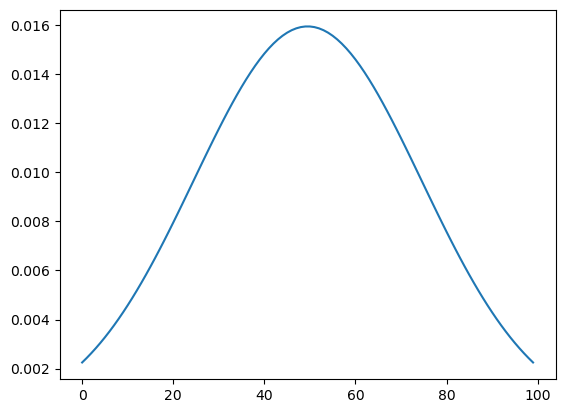

In [203]:
plt.plot(kern1d)

In [198]:
Sm = list([])

for i in np.arange(0, len(CD[3000,:])-L):
    Sm.append(np.sum(kern1d*CD[3000, i:i+L]))

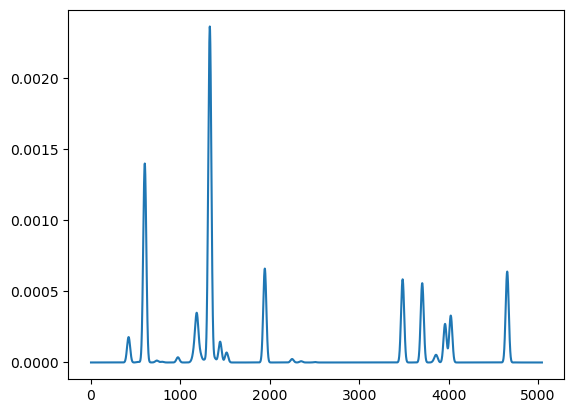

In [199]:
plt.plot(Sm)

In [1]:
plt.plot(CD[3000,:])
plt.plot(Sm)

NameError: name 'plt' is not defined